In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use("seaborn-whitegrid")

In [2]:
data = pd.read_csv("/content/car-data.csv")

In [3]:
data.head()



,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [5]:
data.dropna(axis=0,inplace=True)

In [6]:
data.isna().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [7]:
data=data.drop(['Unnamed: 0','Name','New_Price'],axis=1)


In [8]:
Correct_Mileage= []
for i in data.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        Correct_Mileage.append(float(i))

data['Mileage']=Correct_Mileage

In [9]:
for i in data.index:
    data['Engine'][i] = data['Engine'][i].split()[0]
    data['Power'][i] = data['Power'][i].split()[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
data

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2,Chennai,2011,46000,Petrol,Manual,First,18.0,1199,88.7,5.0,4.50
7,Mumbai,2016,36000,Diesel,Automatic,First,11.3,2755,171.5,8.0,17.50
10,Kochi,2018,25692,Petrol,Manual,First,21.5,1462,103.25,5.0,9.95
15,Delhi,2014,110000,Diesel,Manual,First,13.0,2477,175.56,7.0,15.00
20,Kochi,2014,32982,Diesel,Automatic,First,22.6,1995,190,5.0,18.55
...,...,...,...,...,...,...,...,...,...,...,...
5999,Chennai,2016,10000,Petrol,Manual,First,17.5,1193,88.7,5.0,4.00
6002,Mumbai,2011,38000,Petrol,Manual,First,16.0,1598,103.5,5.0,3.25
6005,Pune,2016,37208,Diesel,Manual,First,24.0,1248,88.5,5.0,7.43
6010,Delhi,2013,33746,Petrol,Manual,First,18.0,1198,86.8,5.0,3.20


In [11]:
X = data.copy()
y = X.pop("Price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [12]:
discrete_features

Location              True
Year                  True
Kilometers_Driven     True
Fuel_Type             True
Transmission          True
Owner_Type            True
Mileage              False
Engine                True
Power                 True
Seats                False
dtype: bool

In [13]:
X

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
2,0,2011,46000,0,0,0,18.0,0,0,5.0
7,1,2016,36000,1,1,0,11.3,1,1,8.0
10,2,2018,25692,0,0,0,21.5,2,2,5.0
15,3,2014,110000,1,0,0,13.0,3,3,7.0
20,2,2014,32982,1,1,0,22.6,4,4,5.0
...,...,...,...,...,...,...,...,...,...,...
5999,0,2016,10000,0,0,0,17.5,13,0,5.0
6002,1,2011,38000,0,0,0,16.0,5,5,5.0
6005,6,2016,37208,1,0,0,24.0,6,6,5.0
6010,3,2013,33746,0,0,0,18.0,14,34,5.0


In [14]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

Power                1.162854
Engine               1.012697
Mileage              0.553036
Transmission         0.216849
Year                 0.179036
Fuel_Type            0.133829
Location             0.075440
Seats                0.067885
Owner_Type           0.006329
Kilometers_Driven    0.000000
Name: MI Scores, dtype: float64

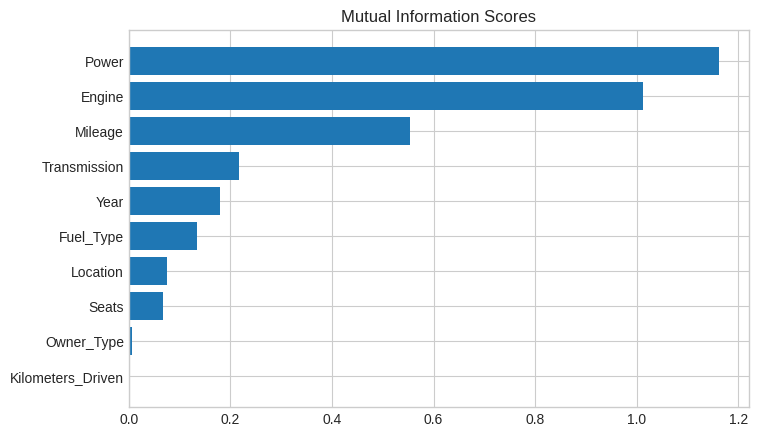

In [15]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

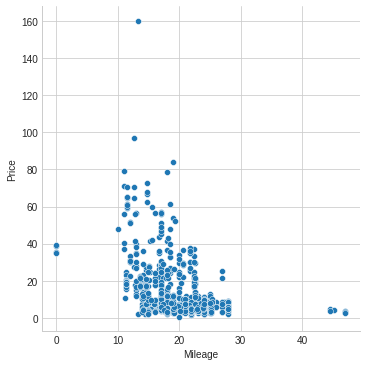

In [16]:
sns.relplot(x="Mileage", y="Price", data=data)


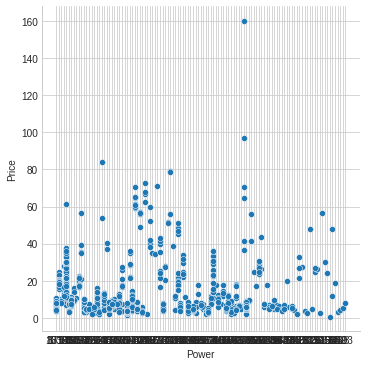

In [17]:
sns.relplot(x="Power", y="Price", data=data)


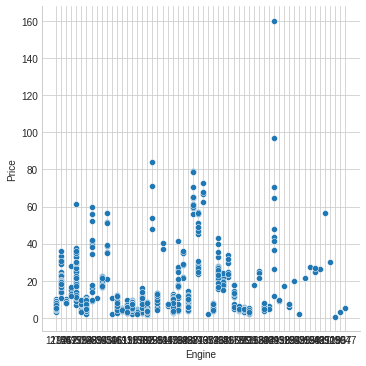

In [18]:
sns.relplot(x="Engine", y="Price", data=data)


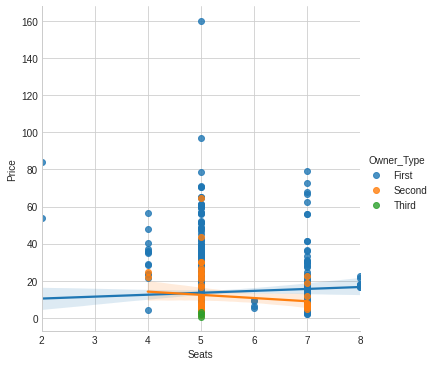

In [19]:
sns.lmplot(x="Seats", y="Price", hue="Owner_Type", data=data)

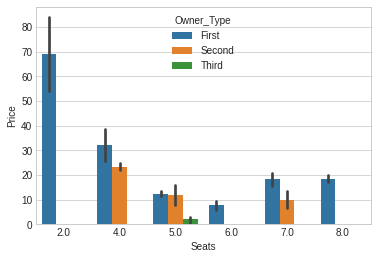

In [20]:
sns.barplot(x="Seats", y="Price", hue="Owner_Type", data=data)

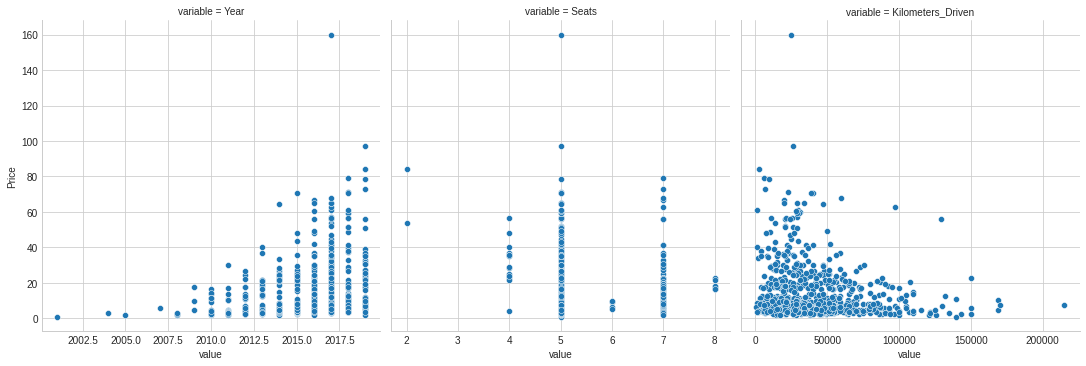

In [21]:
features = ["Year", "Seats", "Kilometers_Driven"]
sns.relplot(
    x="value", y="Price", col="variable", data=data.melt(id_vars="Price", value_vars=features), facet_kws=dict(sharex=False),
)

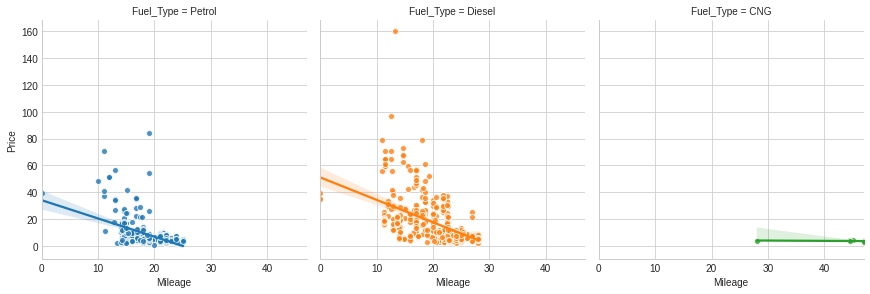

In [22]:
# YOUR CODE HERE: 
feature = "Mileage"

sns.lmplot(
    x=feature, y="Price", hue="Fuel_Type", col="Fuel_Type",
    data=data, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

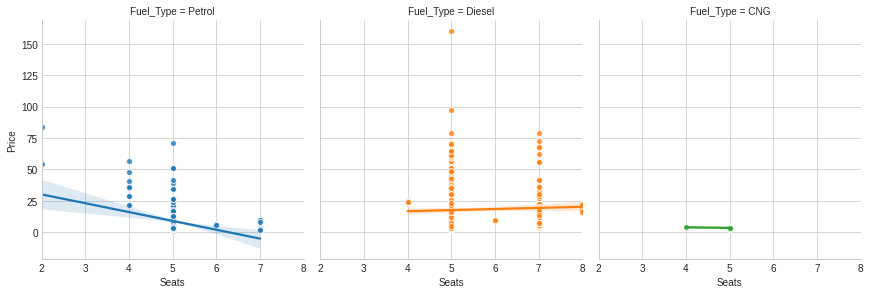

In [23]:
# YOUR CODE HERE: 
feature = "Seats"

sns.lmplot(
    x=feature, y="Price", hue="Fuel_Type", col="Fuel_Type",
    data=data, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);